# Compas Analysis

## Importing Libraries

In [153]:
%run -i projtools/imports.py

'Modules imported succesfully'

## Loading Data

In [2]:
%run -i projtools/data.py

"All tests passed. Your dataframes are: 'df', 'violent_df' and 'cox_df'"

## 'df' Descriptive Statistics

In [3]:
df['length_of_stay'] = (pd.to_numeric(pd.to_datetime(df['c_jail_out'])) - pd.to_numeric(pd.to_datetime(df['c_jail_in'])))
df[['length_of_stay','decile_score']].corr().iloc[0,1]

0.20741201943031615

In [4]:
display(df['age_cat'].value_counts(),
    df['race'].value_counts(),
    df['race'].value_counts().apply(lambda x : x / len(df) * 100),
    df['score_text'].value_counts(),
    pd.crosstab(df['sex'],df['race']),
    df['sex'].value_counts(),
    df['sex'].value_counts().apply(lambda x : x / len(df) * 100),
    len(df[df['two_year_recid'] == 1]),
    len(df[df['two_year_recid'] == 1]) / len(df) * 100,
    pd.crosstab(df['decile_score'],df['race']))

age_cat
25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: count, dtype: int64

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64

race
African-American    51.441996
Caucasian           34.073234
Hispanic             8.246922
Other                5.557356
Asian                0.502268
Native American      0.178224
Name: count, dtype: float64

score_text
Low       3421
Medium    1607
High      1144
Name: count, dtype: int64

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
sex,,,,,,
Female,549,2,482,82,2,58
Male,2626,29,1621,427,9,285


sex
Male      4997
Female    1175
Name: count, dtype: int64

sex
Male      80.962411
Female    19.037589
Name: count, dtype: float64

2809

45.51198963058976

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
decile_score,,,,,,
1,365,15,605,159,0,142
2,346,4,321,89,2,60
3,298,5,238,73,1,32
4,337,0,243,47,0,39
5,323,1,200,39,0,19
6,318,2,160,27,2,20
7,343,1,113,28,2,9
8,301,2,96,14,0,7
9,317,0,77,17,2,7


In [23]:
#using groupby to create a table which can be turned into a barchart
df['Index'] = df.index
african_american_barchart = df[df['race'] == 'African-American'].groupby(['decile_score'])['Index'].unique().apply(len)
caucasian_barchart = df[df['race'] == 'Caucasian'].groupby(['decile_score'])['Index'].unique().apply(len)
df = df.drop(['Index'],axis=1)

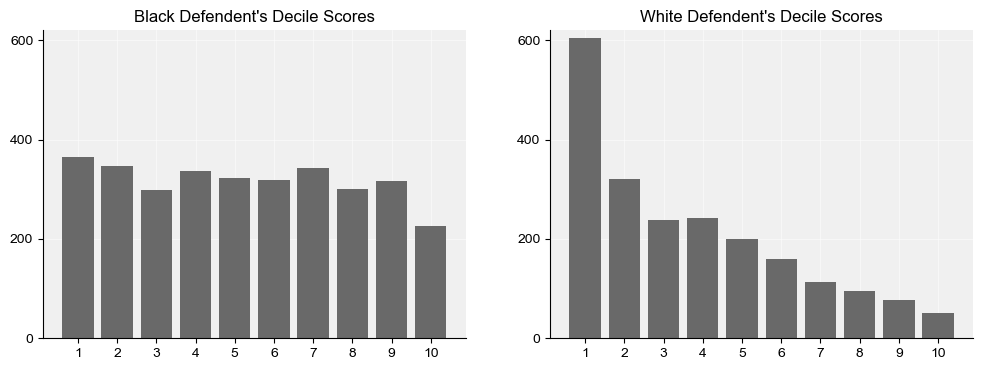

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#format for barchart_setting(axes1,axes2,upper_ylim)
graph_formats.barchart_setting(ax1,ax2,620)

ax1.bar(african_american_barchart.index,african_american_barchart.values,color='dimgrey',zorder=2)
ax1.set_title("Black Defendent's Decile Scores")
ax2.bar(caucasian_barchart.index,caucasian_barchart.values,color='dimgrey',zorder=2)
ax2.set_title("White Defendent's Decile Scores");

In [7]:
df['Index'] = df.index
african_american_barchart = df[df['race'] == 'African-American'].groupby(['decile_score'])['Index'].unique().apply(len)
caucasian_barchart = df[df['race'] == 'Caucasian'].groupby(['decile_score'])['Index'].unique().apply(len)

In [8]:
df['Index'] = df.index


In [35]:
model = smf.logit(formula='score_text_low_high_HighScore ~ sex_Female + age_cat_Less_than_25 + age_cat_Greater_than_45 + race_African_American + race_Asian + race_Hispanic + race_Native_American + race_Other + priors_count + c_charge_degree_M + two_year_recid', data=df).fit()
display(model.summary())

Optimization terminated successfully.
         Current function value: 0.499708
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     score_text_low_high_HighScore   No. Observations:                 6172
Model:                                     Logit   Df Residuals:                     6160
Method:                                      MLE   Df Model:                           11
Date:                           Mon, 18 Dec 2023   Pseudo R-squ.:                  0.2729
Time:                                   20:09:11   Log-Likelihood:                -3084.2
converged:                                  True   LL-Null:                       -4241.7
Covariance Type:                       nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.5255      0.079    -19.430      0.000      -1.679      -1.372
sex_Female                  0.2213      0.080      2.783      0.005       0.065       0.377
age_cat_Less_than_25        1.3084      0.076     17.232      0.000       1.160       1.457
age_cat_Greater_than_45    -1.3556      0.099    -13.682      0.000      -1.550      -1.161
race_African_American       0.4772      0.069      6.881      0.000       0.341       0.613
race_Asian                 -0.2544      0.478     -0.532      0.595      -1.192       0.683
race_Hispanic              -0.4284      0.128     -3.344      0.001      -0.680      -0.177
race_Native_American        1.3942      0.766      1.820      0.069      -0.107       2.896
race_Other                 -0.8263      0.162     -5.098      0.000      -1.144      -0.509
priors_count                0.2689      0.011     24.221      0.000       0.247       0.291
c_charge_degree_M          -0.3112      0.067     -4.677      0.000      -0.442      -0.181
two_year_recid              0.6859      0.064     10.713      0.000       0.560       0.811
===========================================================================================
"""

## DO NOT FORGET TO DO LOG ODDS HERE

## Calculating Odds Ratios
Why did they do this so differently?
Does it matter - or can we back up what we are saying here?

In [80]:
#converting log-odds to odds
odds_baselevel = np.exp(model.params.Intercept)
odds_black = np.exp(model.params.race_African_American)

#calculating an odds ratio
display(f"Using an odds ratio, black defendants are " + str(odds_black/odds_baselevel * 100)[:3] + "% more likely to receive a high score than white defendants.")

'Using an odds ratio, black defendants are 740% more likely to receive a high score than white defendants.'

In [231]:
odds_female = np.exp(model.params.sex_Female)
display(f"Using an odds ratio, female defendants are " + str(odds_female/odds_baselevel * 100)[:3] + "% more likely to receive a high score than male defendants.")

'Using an odds ratio, female defendants are 573% more likely to receive a high score than male defendants.'

In [232]:
odds_under25 = np.exp(model.params.age_cat_Less_than_25) / (1 + np.exp(model.params.age_cat_Less_than_25))
odds_over45 = np.exp(model.params.age_cat_Greater_than_45) / (1 + np.exp(model.params.age_cat_Greater_than_45))
display(f"Using an odds ratio, defendants under 25 are " + str(odds_under25/odds_baselevel * 100)[:3] + "% more likely to receive a high score than defendants between 25 and 45.")
display(f"Using an odds ratio, defendants over 45 are " + str(odds_over45/odds_baselevel * 100)[:2] + "% more likely to receive a high score than defendants between 25 and 45.")


'Using an odds ratio, defendants under 25 are 361% more likely to receive a high score than defendants between 25 and 45.'

'Using an odds ratio, defendants over 45 are 94% more likely to receive a high score than defendants between 25 and 45.'

## 'violent_df' Descriptive Statistics

In [10]:
display(violent_df['age_cat'].value_counts(),
    violent_df['race'].value_counts(),
    violent_df['v_score_text'].value_counts(),
    len(violent_df[violent_df['two_year_recid'] == 1]),
    len(violent_df[violent_df['two_year_recid'] == 1]) / len(violent_df) * 100)

age_cat
25 - 45            2300
Greater than 45     954
Less than 25        766
Name: count, dtype: int64

race
African-American    1918
Caucasian           1459
Hispanic             355
Other                255
Asian                 26
Native American        7
Name: count, dtype: int64

v_score_text
Low       2913
Medium     828
High       279
Name: count, dtype: int64

652

16.218905472636816

In [26]:
violent_df['Index'] = violent_df.index
v_african_american_barchart = violent_df[violent_df['race'] == 'African-American'].groupby(['v_decile_score'])['Index'].unique().apply(len)
v_caucasian_barchart = violent_df[violent_df['race'] == 'Caucasian'].groupby(['v_decile_score'])['Index'].unique().apply(len)
violent_df = violent_df.drop(['Index'],axis=1)

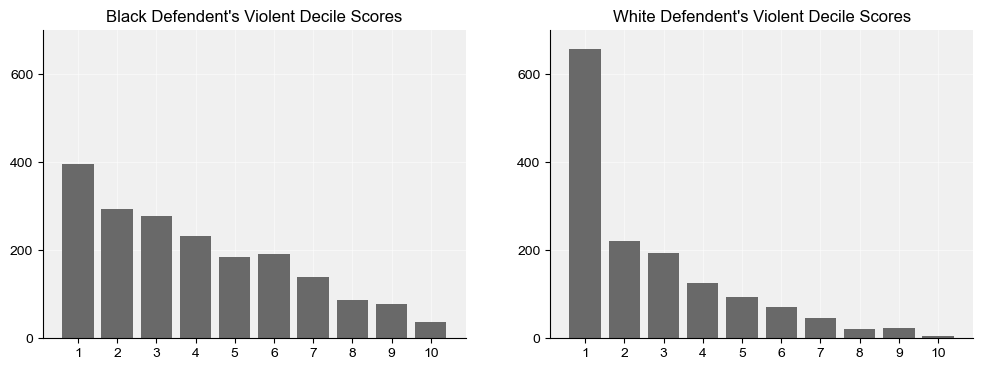

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

graph_formats.barchart_setting(ax1,ax2,700)

ax1.bar(v_african_american_barchart.index,v_african_american_barchart.values,color='dimgrey',zorder=2)
ax1.set_title("Black Defendent's Violent Decile Scores")
ax2.bar(v_caucasian_barchart.index,v_caucasian_barchart.values,color='dimgrey',zorder=2)
ax2.set_title("White Defendent's Violent Decile Scores");

In [12]:
violent_df.columns

Index(['age', 'c_charge_degree', 'race', 'age_cat', 'v_score_text', 'sex',
       'priors_count', 'days_b_screening_arrest', 'v_decile_score', 'is_recid',
       'two_year_recid', 'v_score_text_low/high', 'c_charge_degree_M',
       'age_cat_Greater_than_45', 'age_cat_Less_than_25',
       'race_African_American', 'race_Asian', 'race_Hispanic',
       'race_Native_American', 'race_Other', 'sex_Female',
       'v_score_text_low_high_HighScore', 'Index'],
      dtype='object')

In [13]:
model = smf.logit(formula='v_score_text_low_high_HighScore ~ sex_Female + age_cat_Less_than_25 + age_cat_Greater_than_45 + race_African_American + race_Asian + race_Hispanic + race_Native_American + race_Other + priors_count + c_charge_degree_M + two_year_recid', data=violent_df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.372983
         Iterations 7
                                  Logit Regression Results                                 
Dep. Variable:     v_score_text_low_high_HighScore   No. Observations:                 4020
Model:                                       Logit   Df Residuals:                     4008
Method:                                        MLE   Df Model:                           11
Date:                             Mon, 18 Dec 2023   Pseudo R-squ.:                  0.3662
Time:                                     19:41:45   Log-Likelihood:                -1499.4
converged:                                    True   LL-Null:                       -2365.9
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

## 'cox_df' Descriptive Statistics

In [14]:
display(cox_df['score_text'].value_counts(),
    cox_df['race'].value_counts())

score_text
Low       5751
Medium    2611
High      1952
Name: count, dtype: int64

race
African-American    5147
Caucasian           3569
Hispanic             944
Other                571
Asian                 51
Native American       32
Name: count, dtype: int64

## Predictive Accuracy of COMPAS

In [15]:
from itertools import combinations
recid_by_size = cox_df.groupby('score_text')['is_recid'].agg(['sum','size'])
recid_by_size.loc['HighMedium'] = recid_by_size.loc['High'] + recid_by_size.loc['Medium']
recid_by_size['percent'] = recid_by_size['sum']/recid_by_size['size']
display(f"HighMedium vs Low: {recid_by_size.loc['HighMedium','percent']/recid_by_size.loc['Low','percent']}",
    f"High vs Low: {recid_by_size.loc['High','percent']/recid_by_size.loc['Low','percent']}",
    f"Text concordance: {conc.concordance_text_score(cox_df,['is_recid','score_text'],100)}")

'HighMedium vs Low: 2.0266205404250206'

'High vs Low: 2.3033191633053325'

'Text concordance: 67.42493175614194'

In [16]:
display(f"Decile concordance: {conc.concordance_decile_score(cox_df,['is_recid','decile_score'],100)}")

'Decile concordance: 67.27019498607241'

In [17]:
recid_by_size_black = cox_df[cox_df['race'] == 'African-American'].groupby('score_text')['is_recid'].agg(['sum','size'])
recid_by_size_black['percent'] = recid_by_size_black['sum']/recid_by_size_black['size']
recid_by_size_white = cox_df[cox_df['race'] == 'Caucasian'].groupby('score_text')['is_recid'].agg(['sum','size'])
recid_by_size_white['percent'] = recid_by_size_white['sum']/recid_by_size_white['size']
display(f"High vs Low (African-American): {recid_by_size_black.loc['High','percent']/recid_by_size_black.loc['Low','percent']}",
        f"High vs Low (Caucasian): {recid_by_size_white.loc['High','percent']/recid_by_size_white.loc['Low','percent']}")

'High vs Low (African-American): 2.001258311289054'

'High vs Low (Caucasian): 2.4018740554156173'

# Add Recidivism Line Graph for whole pop.

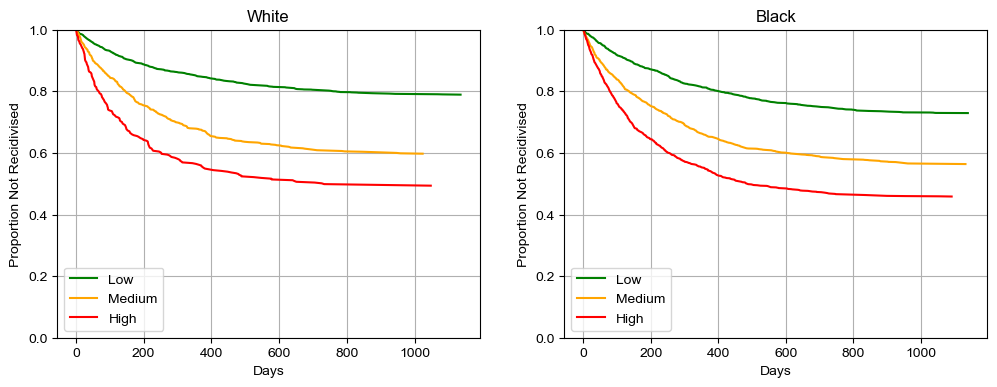

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
cox_df_black = cox_df[cox_df['race'] == 'African-American']
cox_df_white = cox_df[cox_df['race'] == 'Caucasian']

for score, color in zip(['Low', 'Medium', 'High'], ['green', 'orange', 'red']):
    subset = cox_df_white[(cox_df_white['is_recid'] == 1) & (cox_df_white['score_text'] == score)]
    total_count = len(cox_df_white[cox_df_white['score_text'] == score])
    value_counts = subset['duration'].value_counts().sort_index().cumsum()
    proportion = (total_count - value_counts) / total_count
    proportion.plot(ax=ax1, color=color, label=score, title='White')

ax1.set_ylim([0, 1])
ax1.set_ylabel('Proportion Not Recidivised')
ax1.set_xlabel('Days')
ax1.legend()
ax1.grid()

for score, color in zip(['Low', 'Medium', 'High'], ['green', 'orange', 'red']):
    subset = cox_df_black[(cox_df_black['is_recid'] == 1) & (cox_df_black['score_text'] == score)]
    total_count = len(cox_df_black[cox_df_black['score_text'] == score])
    value_counts = subset['duration'].value_counts().sort_index().cumsum()
    proportion = (total_count - value_counts) / total_count
    proportion.plot(ax=ax2, color=color, label=score, title='Black')

ax2.set_ylim([0, 1])
ax2.set_ylabel('Proportion Not Recidivised')
ax2.set_xlabel('Days')
ax2.legend(loc='lower left')
ax2.grid()

# Do White and Black Race Line Graph for violent scores

In [19]:
display(f"Violent Text concordance: {conc.concordance_text_score(cox_df,['is_recid','score_text'],100)}")

'Violent Text concordance: 67.42493175614194'

# Next Section: Directions of the Racial Bias

Realised what is_recid is vs event - is_recid is whether someone has recidivised while event only increases to one, once per person. This means is_recid can have multiple values for the same person when they have only recidivised once

In [227]:
#create class called person
df = pd.read_csv('CompasAnalysis/cox-parsed.csv')
    
#checking the differences between two rows with the same person
differences = df.iloc[3].dropna() != df.iloc[4].dropna()
print(differences[differences].index)
    
#this finds the total lifetime per row
lifetimes =  df.groupby('id')[['start','end']].sum().apply(lambda x: x['end'] - x['start'], axis=1)
lifetimes_df = pd.DataFrame({'id': lifetimes.index, 'lifetimes': lifetimes.values})
lifetimes_df

Index(['start', 'end', 'event'], dtype='object')


,id,lifetimes
0,1,954
1,3,150
2,4,64
3,5,1174
4,6,1102
...,...,...
10326,10997,789
10327,10998,450
10328,10999,808
10329,11000,754


In [229]:
#removing duplicate ID rows
filtered_df = df[~df['id'].duplicated(keep='first')]
filtered_df['lifetimes'] = lifetimes_df['lifetimes']

/var/folders/84/96cp_gkx22nbzf8ksd60gwp00000gn/T/ipykernel_24092/120761170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lifetimes'] = lifetimes_df['lifetimes']


In [203]:
df.groupby('id')['event'].unique().apply(len)

id
1        1
3        1
4        2
5        1
6        1
        ..
10997    1
10998    1
10999    1
11000    1
11001    2
Name: event, Length: 10331, dtype: int64

In [184]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

In [158]:
from CompasAnalysis import truth_tables
from csv import DictReader

people = []
with open("CompasAnalysis/cox-parsed.csv") as f:
    reader = truth_tables.PeekyReader(DictReader(f))
    try:
        while True:
            p = truth_tables.Person(reader)
            if p.valid:
                people.append(p)
    except StopIteration:
        pass

pop = list(filter(lambda i: ((i.recidivist == True and i.lifetime <= 730) or
                              i.lifetime > 730), list(filter(lambda x: x.score_valid, people))))
recid = list(filter(lambda i: i.recidivist == True and i.lifetime <= 730, pop))
rset = set(recid)
surv = [i for i in pop if i not in rset]




In [159]:
print("All defendants")
truth_tables.table(list(recid), list(surv))

All defendants
           	Low	High
Survived   	2681	1282	0.55
Recidivated	1216	2035	0.45
Total: 7214.00
False positive rate: 32.35
False negative rate: 37.40
Specificity: 0.68
Sensitivity: 0.63
Prevalence: 0.45
PPV: 0.61
NPV: 0.69
LR+: 1.94
LR-: 0.55


In [160]:
print(f"Total pop: {(2681 + 1282 + 1216 + 2035)}")

Total pop: 7214


In [161]:
print("Average follow-up time %.2f (sd %.2f)" % (statistics.mean(map(lambda i: i.lifetime, pop)),
                                                statistics.stdev(map(lambda i: i.lifetime, pop))))
print("Median follow-up time %i" % (statistics.median(map(lambda i: i.lifetime, pop))))

Average follow-up time 622.87 (sd 392.19)
Median follow-up time 766


In [170]:
print("Black defendants")
is_afam = truth_tables.is_race("African-American")
truth_tables.table(list(filter(is_afam, recid)), list(filter(is_afam, surv)))

Black defendants
           	Low	High
Survived   	990	805	0.49
Recidivated	532	1369	0.51
Total: 3696.00
False positive rate: 44.85
False negative rate: 27.99
Specificity: 0.55
Sensitivity: 0.72
Prevalence: 0.51
PPV: 0.63
NPV: 0.65
LR+: 1.61
LR-: 0.51


In [172]:
print("White defendants")
is_white = truth_tables.is_race("Caucasian")
truth_tables.table(list(filter(is_white, recid)), list(filter(is_white, surv)))

White defendants
           	Low	High
Survived   	1139	349	0.61
Recidivated	461	505	0.39
Total: 2454.00
False positive rate: 23.45
False negative rate: 47.72
Specificity: 0.77
Sensitivity: 0.52
Prevalence: 0.39
PPV: 0.59
NPV: 0.71
LR+: 2.23
LR-: 0.62


In [173]:
44.85 / 23.45

1.9125799573560769